# Predict if customers are going to return the loan they took from bank using Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree 

In [2]:
cols = ["Initial_Payment","Last_Payment","Credit_Score","House_Number","Sum","Result"]

df = pd.read_csv('Decision_Tree_ Dataset.csv',names=cols)

In [3]:
df.head(5)

,Initial_Payment,Last_Payment,Credit_Score,House_Number,Sum,Result
0,1,2,3,4,sum,NaN
1,201,10018,250,3046,13515,yes
2,205,10016,395,3044,13660,yes
3,257,10129,109,3251,13746,yes
4,246,10064,324,3137,13771,yes


In [4]:
df = df.iloc[1:]
df = df.drop('Sum',axis=1)

df.reset_index(drop=True, inplace=True)

In [5]:
cols = df.columns.tolist()

In [6]:
df.head()

,Initial_Payment,Last_Payment,Credit_Score,House_Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [7]:
df.shape

(1000, 5)

In [8]:
df.isnull().sum()

Initial_Payment    0
Last_Payment       0
Credit_Score       0
House_Number       0
Result             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df["Result"].unique()

array(['yes', 'No'], dtype=object)

In [11]:
df['Result'] = (df['Result'] == 'yes').astype(int)

In [12]:
df.columns

Index(['Initial_Payment', 'Last_Payment', 'Credit_Score', 'House_Number',
       'Result'],
      dtype='object')

In [13]:
print(df["Result"].isna().sum())
print(df["Result"].dtype)
print(df["Result"].unique())
print(cols[:-1])



0
int32
[1 0]
['Initial_Payment', 'Last_Payment', 'Credit_Score', 'House_Number']


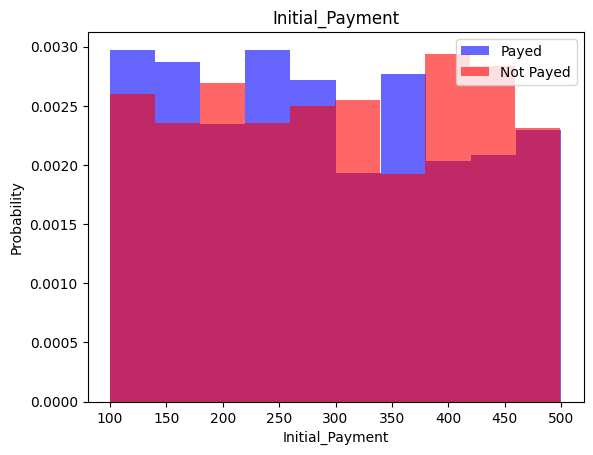

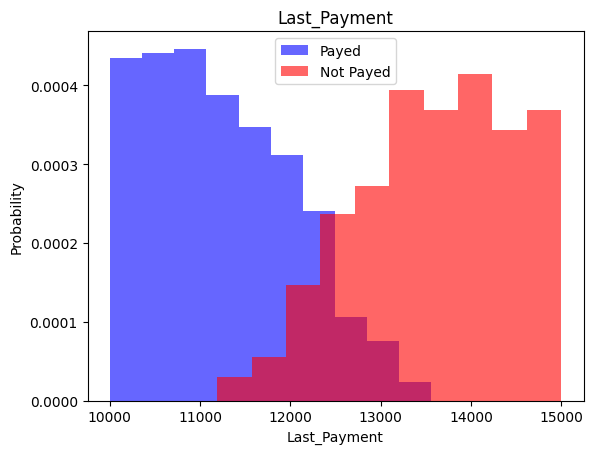

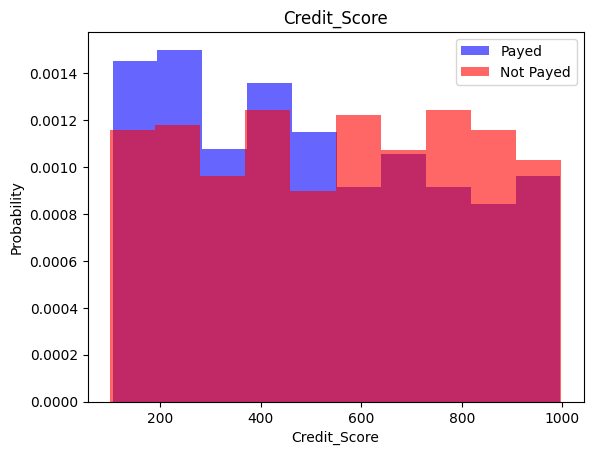

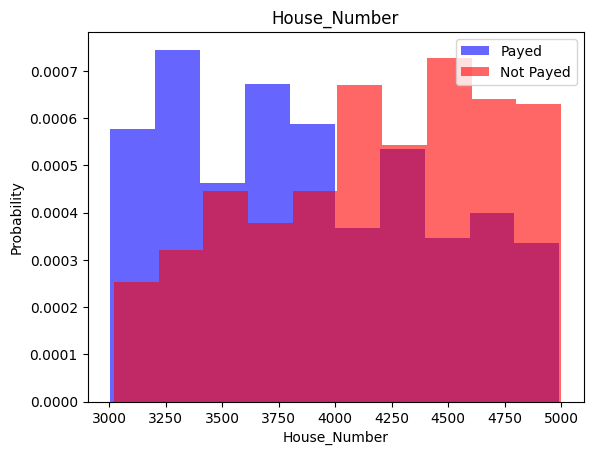

In [14]:
for label in cols[:-1]:
  plt.hist(df[df["Result"]==1][label], color='blue', label='Payed', alpha=0.6, density=True)
  plt.hist(df[df["Result"]==0][label], color='red', label='Not Payed', alpha=0.6, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [15]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, overSample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if overSample:   #oversampling the dataset for more precise result
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [17]:
print(len(train[train['Result']==1]))  
print(len(train[train['Result']==0]))  

283
317


In [18]:
#finalize training dataset
train, X_train, y_train = scale_dataset(train, overSample=True)

In [19]:
sum(y_train==1) 

317

In [20]:
sum(y_train==0)

317

In [21]:
#Validation and Testing datasets
valid, X_valid, y_valid = scale_dataset(valid, overSample=False)
test, X_test, y_test = scale_dataset(test, overSample=False)

# Decision Tree Based On Entropy

In [22]:
DT_Entropy = DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth=3, min_samples_leaf=5)

DecisionTreeClassifier: A machine learning model used for classification tasks. It makes decisions based on a series of rules learned from the data.

criterion='entropy': This parameter specifies how to measure the quality of a split in the decision tree. Using entropy means the tree will try to maximize information gain, which is a measure of how much uncertainty is reduced.

random_state=100: Sets a seed for the random number generator to ensure that results are consistent and reproducible.

max_depth=3: Limits the maximum depth of the tree to 3 levels. This helps prevent the tree from growing too complex and overfitting the training data.

min_samples_leaf=5: Ensures that each leaf node in the tree has at least 5 samples. This helps prevent the model from making overly specific decisions based on very few samples, which can also help reduce overfitting.

In [23]:
DT_Entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [24]:
y_pred = DT_Entropy.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0])

In [26]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        99
           1       0.94      0.86      0.90       101

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [28]:
print(accuracy_score(y_test,y_pred)*100)

90.0


# Decision Tree Based on Gini Index

In [29]:
DT_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)
DT_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [30]:
y_pred = DT_gini.predict(X_test)

In [31]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0])

In [32]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [33]:
print(accuracy_score(y_test,y_pred)*100)

93.0


# The accuracy score of the model is 93%. So now the bank use this model to approve loan request from a perticular customer

In [36]:

# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


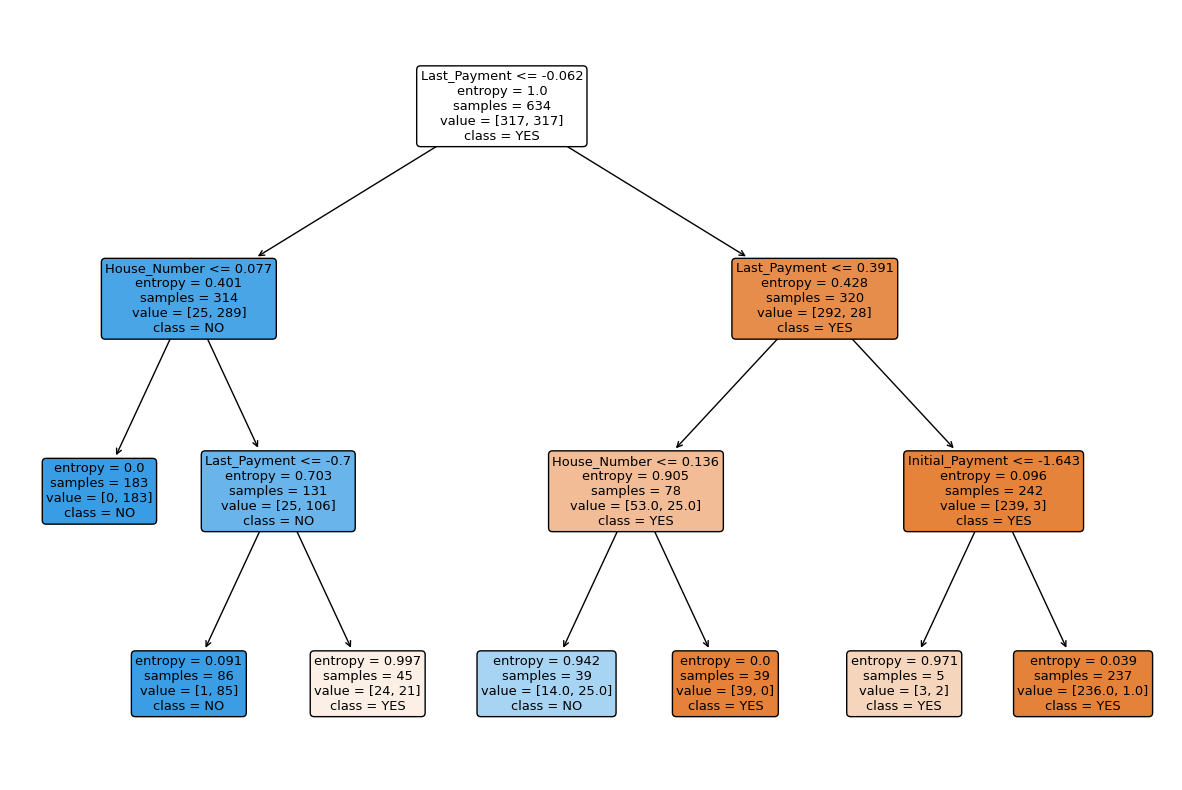

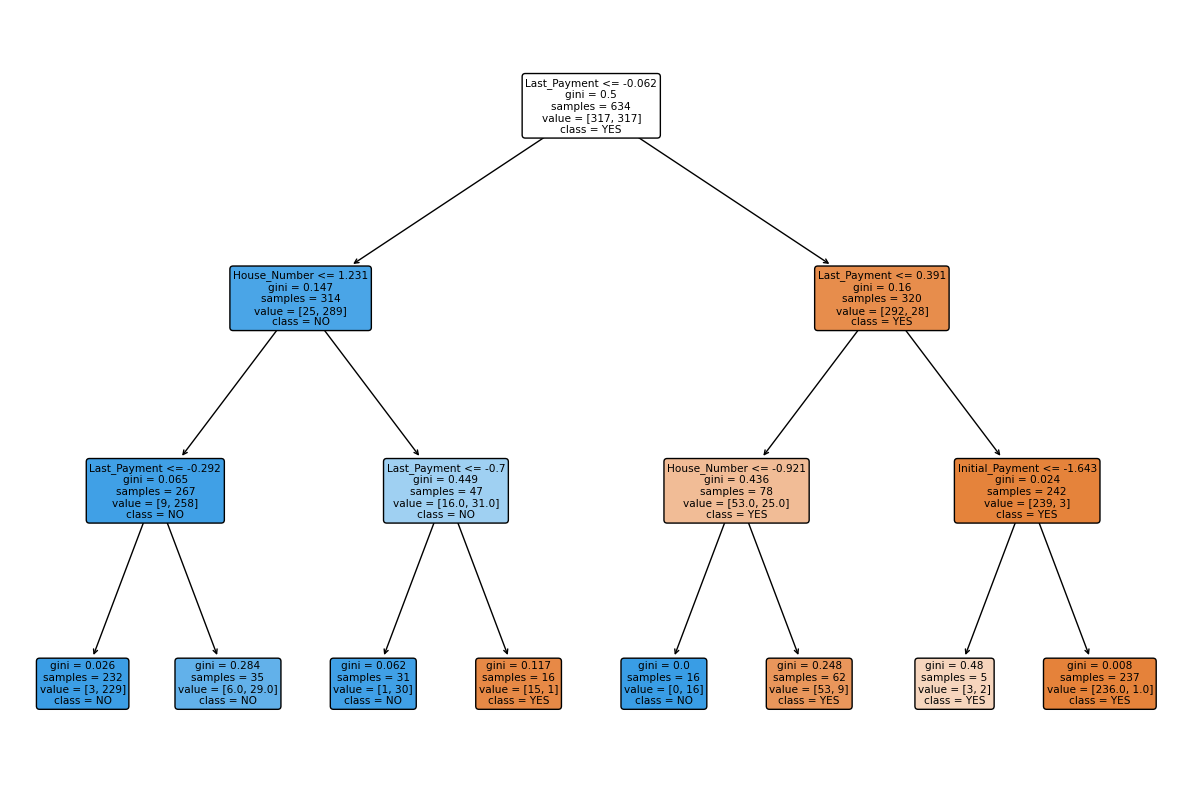

In [39]:
from sklearn.tree import plot_tree

    # Visualizing the Decision Trees
plot_decision_tree(DT_Entropy, ["Initial_Payment","Last_Payment","Credit_Score","House_Number"], ['YES','NO'])
plot_decision_tree(DT_gini, ["Initial_Payment","Last_Payment","Credit_Score","House_Number"], ['YES','NO'])
